In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.dropna(inplace=True)
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:

param_grid = {
            'learning_rate': [0.1,0.05,0.5], 
              'min_child_weight':[1,3,5,7], 
              'eval_metric':['error'],
              'max_depth':[3,5,7]
              }

model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

In [27]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=20, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_score

0.8499797628404064

In [29]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64111
         1.0       0.00      0.00      0.00      1389
         2.0       0.56      0.19      0.28     10604

    accuracy                           0.85     76104
   macro avg       0.48      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104



c:\ProgramData\anaconda3\envs\aml_proj\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\aml_proj\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\aml_proj\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
def plot_imp_features(cols, fimp):
    data = pd.DataFrame({'Feature': cols, 'Importance': fimp})
    data = data.sort_values('Importance', ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=data)
    plt.ylabel('Features', fontsize=14)
    plt.xlabel('Importance', fontsize=14)
    plt.title('Feature Importances', fontsize=16)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()

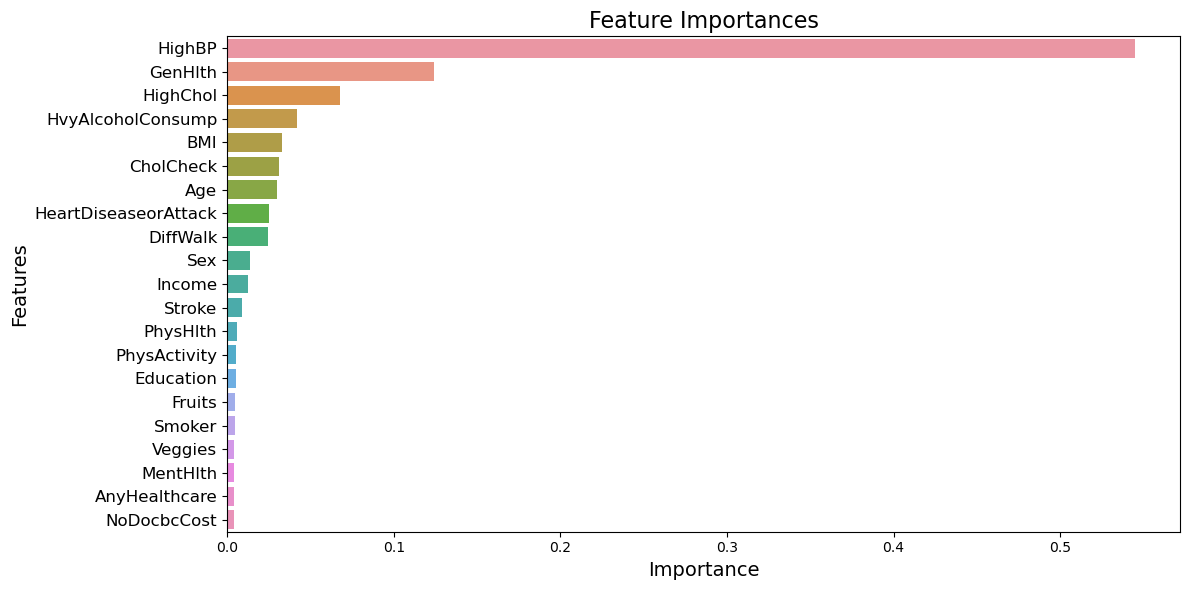

In [23]:
plot_imp_features(X.columns,best_model.feature_importances_)

1. Print the best model